# Result Figure 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind
from matplotlib.patches import Patch

In [2]:
# excel_file_path = "./Result Table-apr.csv"
# diatrend_df = pd.read_csv(excel_file_path)
excel_file_path = "./Result Table (1).xlsx"
diatrend_df = pd.read_excel(excel_file_path, sheet_name="cross_dataset")
diatrend_df.head()

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,Rabby_retrained,Li_retrained,Rabby_crosscheck,Li_crosscheck,baseline
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,22.721628,21.346598,22.721628,21.830528,26.662815
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,17.686695,17.790308,17.686695,18.157267,23.247402
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,17.218540,16.038720,17.218540,16.875702,23.262571
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,20.015371,18.493727,20.015371,18.869516,28.477447
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,18.488050,18.988787,18.488050,19.197340,20.256378


In [3]:
# Retrained_result
retrained_result = diatrend_df[["Dataset", "SubjectID", "Martinsson_retrained", "vanDoorn_retrained", "Deng_retrained", "Lee_retrained", "Rabby_retrained", "Li_retrained"]].copy()

In [2]:
excel_file_path = "./result_final.csv"
diatrend_df = pd.read_csv(excel_file_path)
# Retrained_result
retrained_result = diatrend_df[["Dataset", "SubjectID", "Martinsson_retrained", "vanDoorn_retrained", "Deng_retrained", "Lee_retrained", "Rabby_retrained", "Li_retrained"]].copy()


In [3]:
retrained_result

,Dataset,SubjectID,Martinsson_retrained,vanDoorn_retrained,Deng_retrained,Lee_retrained,Rabby_retrained,Li_retrained
0,OhioT1DM,540,21.352480,21.641844,22.35,22.78,22.721628,21.346598
1,OhioT1DM,544,17.058359,17.046157,17.15,18.18,17.686695,17.790308
2,OhioT1DM,552,16.038330,16.355163,16.60,16.67,17.218540,16.038720
3,OhioT1DM,559,18.618088,19.028491,19.06,19.87,20.015371,18.493727
4,OhioT1DM,563,17.997108,18.097660,18.38,18.32,18.488050,18.988787
...,...,...,...,...,...,...,...,...
123,T1DEXI,1683,19.714340,19.917330,20.03,21.16,26.329340,20.413847
124,T1DEXI,1689,20.082270,20.268260,20.31,20.26,27.674505,19.903198
125,T1DEXI,1695,18.867980,18.830070,19.06,19.37,28.054304,20.170574
126,T1DEXI,1722,18.450220,18.511040,18.76,19.47,25.121897,19.038015


In [4]:
demographics = pd.read_csv('./demographics.csv')
demographics.head()

,Dataset,Patient_id,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,"BMI (just for T1DEXI, normal or overweight)",HbA1C
0,OhioT1DM,540,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,559,F,20–40,NaN,167.8130,36.87849,0.553600,NaN,PUMP,NaN,NaN
4,OhioT1DM,563,M,40–60,NaN,149.8922,28.71523,0.711924,NaN,PUMP,NaN,NaN


In [ ]:
# Merge the two datasets on "Dataset" and "SubjectID"/"Patient_id"
merged_df = pd.merge(
    retrained_result,
    demographics,
    left_on=["Dataset", "SubjectID"],
    right_on=["Dataset", "Patient_id"],
    how="inner"  # Use "inner" to keep only matching rows
)

# Drop the redundant "Patient_id" column after merging
merged_df = merged_df.drop(columns=["Patient_id"])

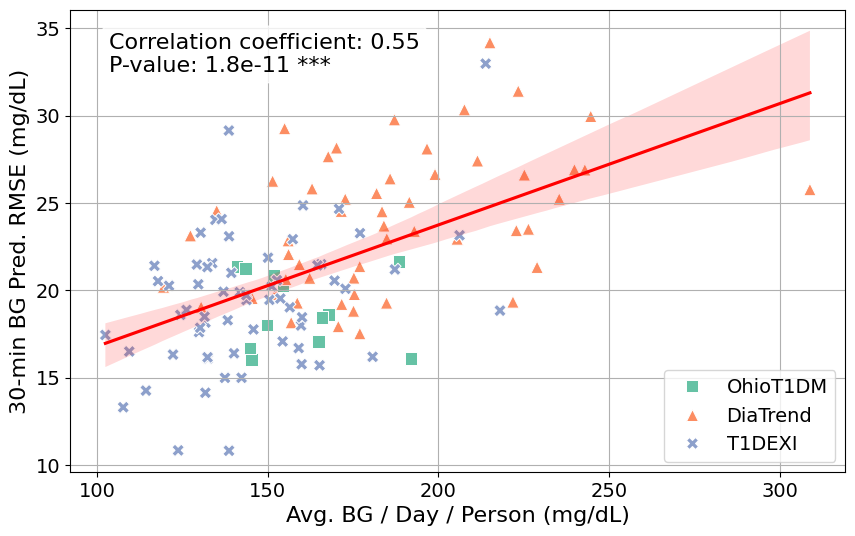

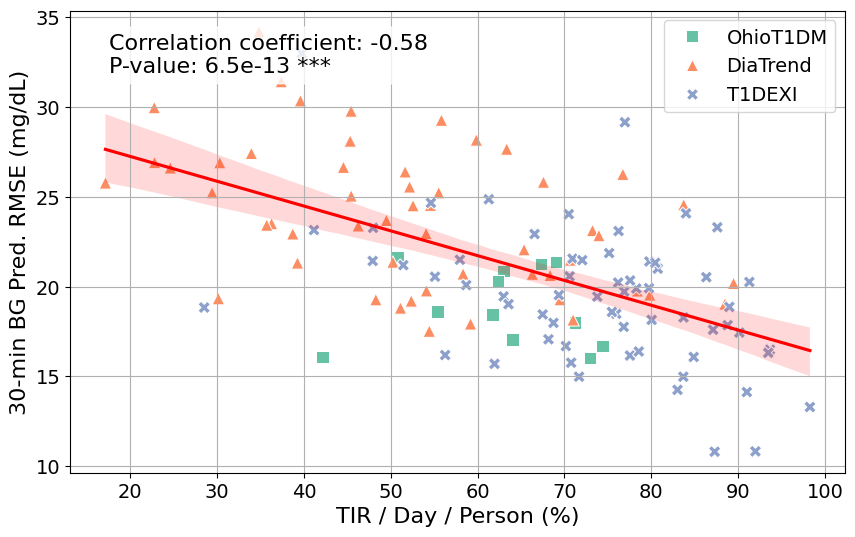

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming mixed_df is already defined and includes a 'Dataset' column

# Scatter plot for AVE CGM (daily avg) & RMSE_own
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='AVE CGM (daily avg)', y='Martinsson_retrained', hue='Dataset', data=merged_df, palette='Set2', s=50)
sns.scatterplot(
    x='AVE CGM (daily avg)', 
    y='Martinsson_retrained', 
    hue='Dataset', 
    style='Dataset',  # Add different marker shapes for each Dataset
    data=merged_df, 
    palette='Set2', 
    s=80, 
    markers={'OhioT1DM': 's', 'DiaTrend': '^', 'T1DEXI': 'X'}
)
sns.regplot(x='AVE CGM (daily avg)', y='Martinsson_retrained', data=merged_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['Martinsson_retrained'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.1e} ***',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=16,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor='white', alpha=0.8))

plt.xlabel('Avg. BG / Day / Person (mg/dL)', fontsize=16)
plt.ylabel('30-min BG Pred. RMSE (mg/dL)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Correlation between Daily Avg BG and BG Prediction RMSE', fontsize=16)
plt.grid(True)
# Place the legend in the lower right corner
plt.legend(loc='lower right', fontsize=14)
plt.show()

# Scatter plot for TIR ratio & RMSE_own
import matplotlib.ticker as mticker
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='TIR ratio', y='Martinsson_retrained', hue='Dataset', data=merged_df, palette='Set2', s=50)
sns.scatterplot(
    x='TIR ratio', 
    y='Martinsson_retrained', 
    hue='Dataset', 
    style='Dataset',  # Add different marker shapes for each Dataset
    data=merged_df, 
    palette='Set2', 
    s=80, 
    markers={'OhioT1DM': 's', 'DiaTrend': '^', 'T1DEXI': 'X'}
)
sns.regplot(x='TIR ratio', y='Martinsson_retrained', data=merged_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['Martinsson_retrained'])

plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.1e} ***',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=16,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor='white', alpha=0.8))

plt.xlabel('TIR / Day / Person (%)', fontsize=16)
plt.ylabel('30-min BG Pred. RMSE (mg/dL)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x * 100:.0f}'))
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

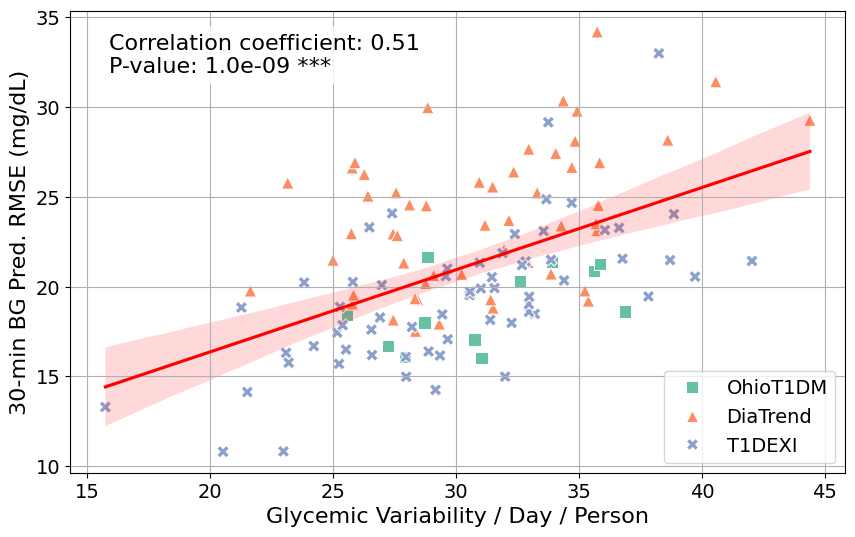

In [45]:
# Scatter plot for TIR ratio & RMSE_own
plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Gly var (daily std)', y='RMSE_own', hue='Dataset', data=merged_df, palette='Set2', s=50)
sns.scatterplot(
    x='Gly var (daily std)', 
    y='Martinsson_retrained', 
    hue='Dataset', 
    style='Dataset',  # Add different marker shapes for each Dataset
    data=merged_df, 
    palette='Set2', 
    s=80, 
    markers={'OhioT1DM': 's', 'DiaTrend': '^', 'T1DEXI': 'X'}
)
sns.regplot(x='Gly var (daily std)', y='Martinsson_retrained', data=merged_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['Martinsson_retrained'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.1e} ***',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=16,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor='white', alpha=0.8))

plt.xlabel('Glycemic Variability / Day / Person', fontsize=16)
plt.ylabel('30-min BG Pred. RMSE (mg/dL)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Correlation between Daily Glycemic Variability and BG Prediction RMSE', fontsize=16)
plt.grid(True)
plt.legend(loc='lower right', fontsize=14)
plt.show()

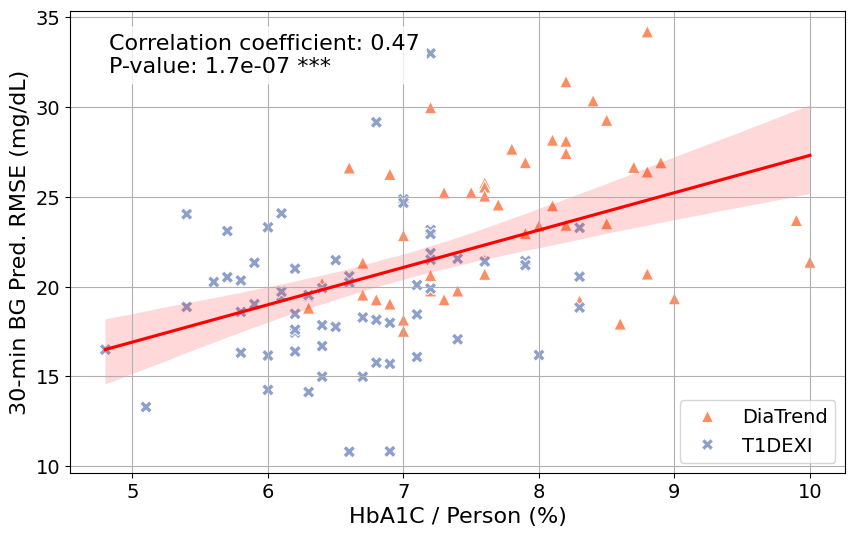

In [46]:
# Define the order of the Dataset categories to ensure consistency
filtered_df = merged_df[~merged_df['HbA1C'].isna()]
dataset_order = merged_df['Dataset'].unique()  # Use the original order of the Dataset column

# Scatter plot for HbA1C & Martinsson_retrained
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='HbA1C', 
    y='Martinsson_retrained', 
    hue='Dataset', 
    style='Dataset',  # Add different marker shapes for each Dataset
    hue_order=dataset_order,  # Explicitly set the order for hue
    style_order=dataset_order,  # Explicitly set the order for style
    data=filtered_df,  # Use the filtered DataFrame
    palette='Set2', 
    s=80, 
    markers={'OhioT1DM': 's', 'DiaTrend': '^', 'T1DEXI': 'X'}
)
sns.regplot(x='HbA1C', y='Martinsson_retrained', data=filtered_df, scatter=False, color='red')

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Martinsson_retrained'])

# Annotate the plot with correlation coefficient and p-value
plt.annotate(f'Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.1e} ***',
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=16,
             horizontalalignment='left', verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor='white', alpha=0.8))

plt.xlabel('HbA1C / Person (%)', fontsize=16)
plt.ylabel('30-min BG Pred. RMSE (mg/dL)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles[-2:], labels[-2:], loc='lower right', fontsize=14)
plt.show()

In [ ]:
# Calculate correlation coefficient and p-value: AVE CGM (daily avg)
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['Martinsson_retrained'])
print(f"Martinsson correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['Li_retrained'])
print(f"Li correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['vanDoorn_retrained'])
print(f"vanDoorn correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['Deng_retrained'])
print(f"Deng correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['Rabby_retrained'])
print(f"Rabby correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['AVE CGM (daily avg)'], merged_df['Lee_retrained'])
print(f"Lee correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")

Martinsson correlation coefficient = 0.55, p-value = 1.8e-11
Li correlation coefficient = 0.67, p-value = 1.1e-17
vanDoorn correlation coefficient = 0.56, p-value = 5.5e-12
Deng correlation coefficient = 0.56, p-value = 6.8e-12
Rabby correlation coefficient = 0.57, p-value = 3.1e-12
Lee correlation coefficient = 0.64, p-value = 5.2e-16


In [ ]:
# Calculate correlation coefficient and p-value: TIR
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['Martinsson_retrained'])
print(f"Martinsson correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['Li_retrained'])
print(f"Li correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['vanDoorn_retrained'])
print(f"vanDoorn correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['Deng_retrained'])
print(f"Deng correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['Rabby_retrained'])
print(f"Rabby correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['TIR ratio'], merged_df['Lee_retrained'])
print(f"Lee correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")

Martinsson correlation coefficient = -0.58, p-value = 6.5e-13
Li correlation coefficient = -0.65, p-value = 6.3e-17
vanDoorn correlation coefficient = -0.60, p-value = 9.5e-14
Deng correlation coefficient = -0.59, p-value = 1.7e-13
Rabby correlation coefficient = -0.56, p-value = 4.3e-12
Lee correlation coefficient = -0.66, p-value = 1.7e-17


In [38]:
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['Martinsson_retrained'])
print(f"Martinsson correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['Li_retrained'])
print(f"Li correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['vanDoorn_retrained'])
print(f"vanDoorn correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['Deng_retrained'])
print(f"Deng correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['Rabby_retrained'])
print(f"Rabby correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(merged_df['Gly var (daily std)'], merged_df['Lee_retrained'])
print(f"Lee correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")

Martinsson correlation coefficient = 0.51, p-value = 1.0e-09
Li correlation coefficient = 0.39, p-value = 6.5e-06
vanDoorn correlation coefficient = 0.52, p-value = 3.2e-10
Deng correlation coefficient = 0.51, p-value = 8.4e-10
Rabby correlation coefficient = 0.38, p-value = 8.7e-06
Lee correlation coefficient = 0.50, p-value = 2.2e-09


In [39]:
# Calculate correlation coefficient and p-value: GV
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Martinsson_retrained'])
print(f"Martinsson correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Li_retrained'])
print(f"Li correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['vanDoorn_retrained'])
print(f"vanDoorn correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Deng_retrained'])
print(f"Deng correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Rabby_retrained'])
print(f"Rabby correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")
corr_coef, p_value = pearsonr(filtered_df['HbA1C'], filtered_df['Lee_retrained'])
print(f"Lee correlation coefficient = {corr_coef:.2f}, p-value = {p_value:.1e}")

Martinsson correlation coefficient = 0.47, p-value = 1.7e-07
Li correlation coefficient = 0.45, p-value = 7.9e-07
vanDoorn correlation coefficient = 0.48, p-value = 7.2e-08
Deng correlation coefficient = 0.48, p-value = 6.3e-08
Rabby correlation coefficient = 0.34, p-value = 2.6e-04
Lee correlation coefficient = 0.52, p-value = 4.0e-09
